In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [195]:
df=pd.read_csv('housing.csv')

In [197]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [199]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


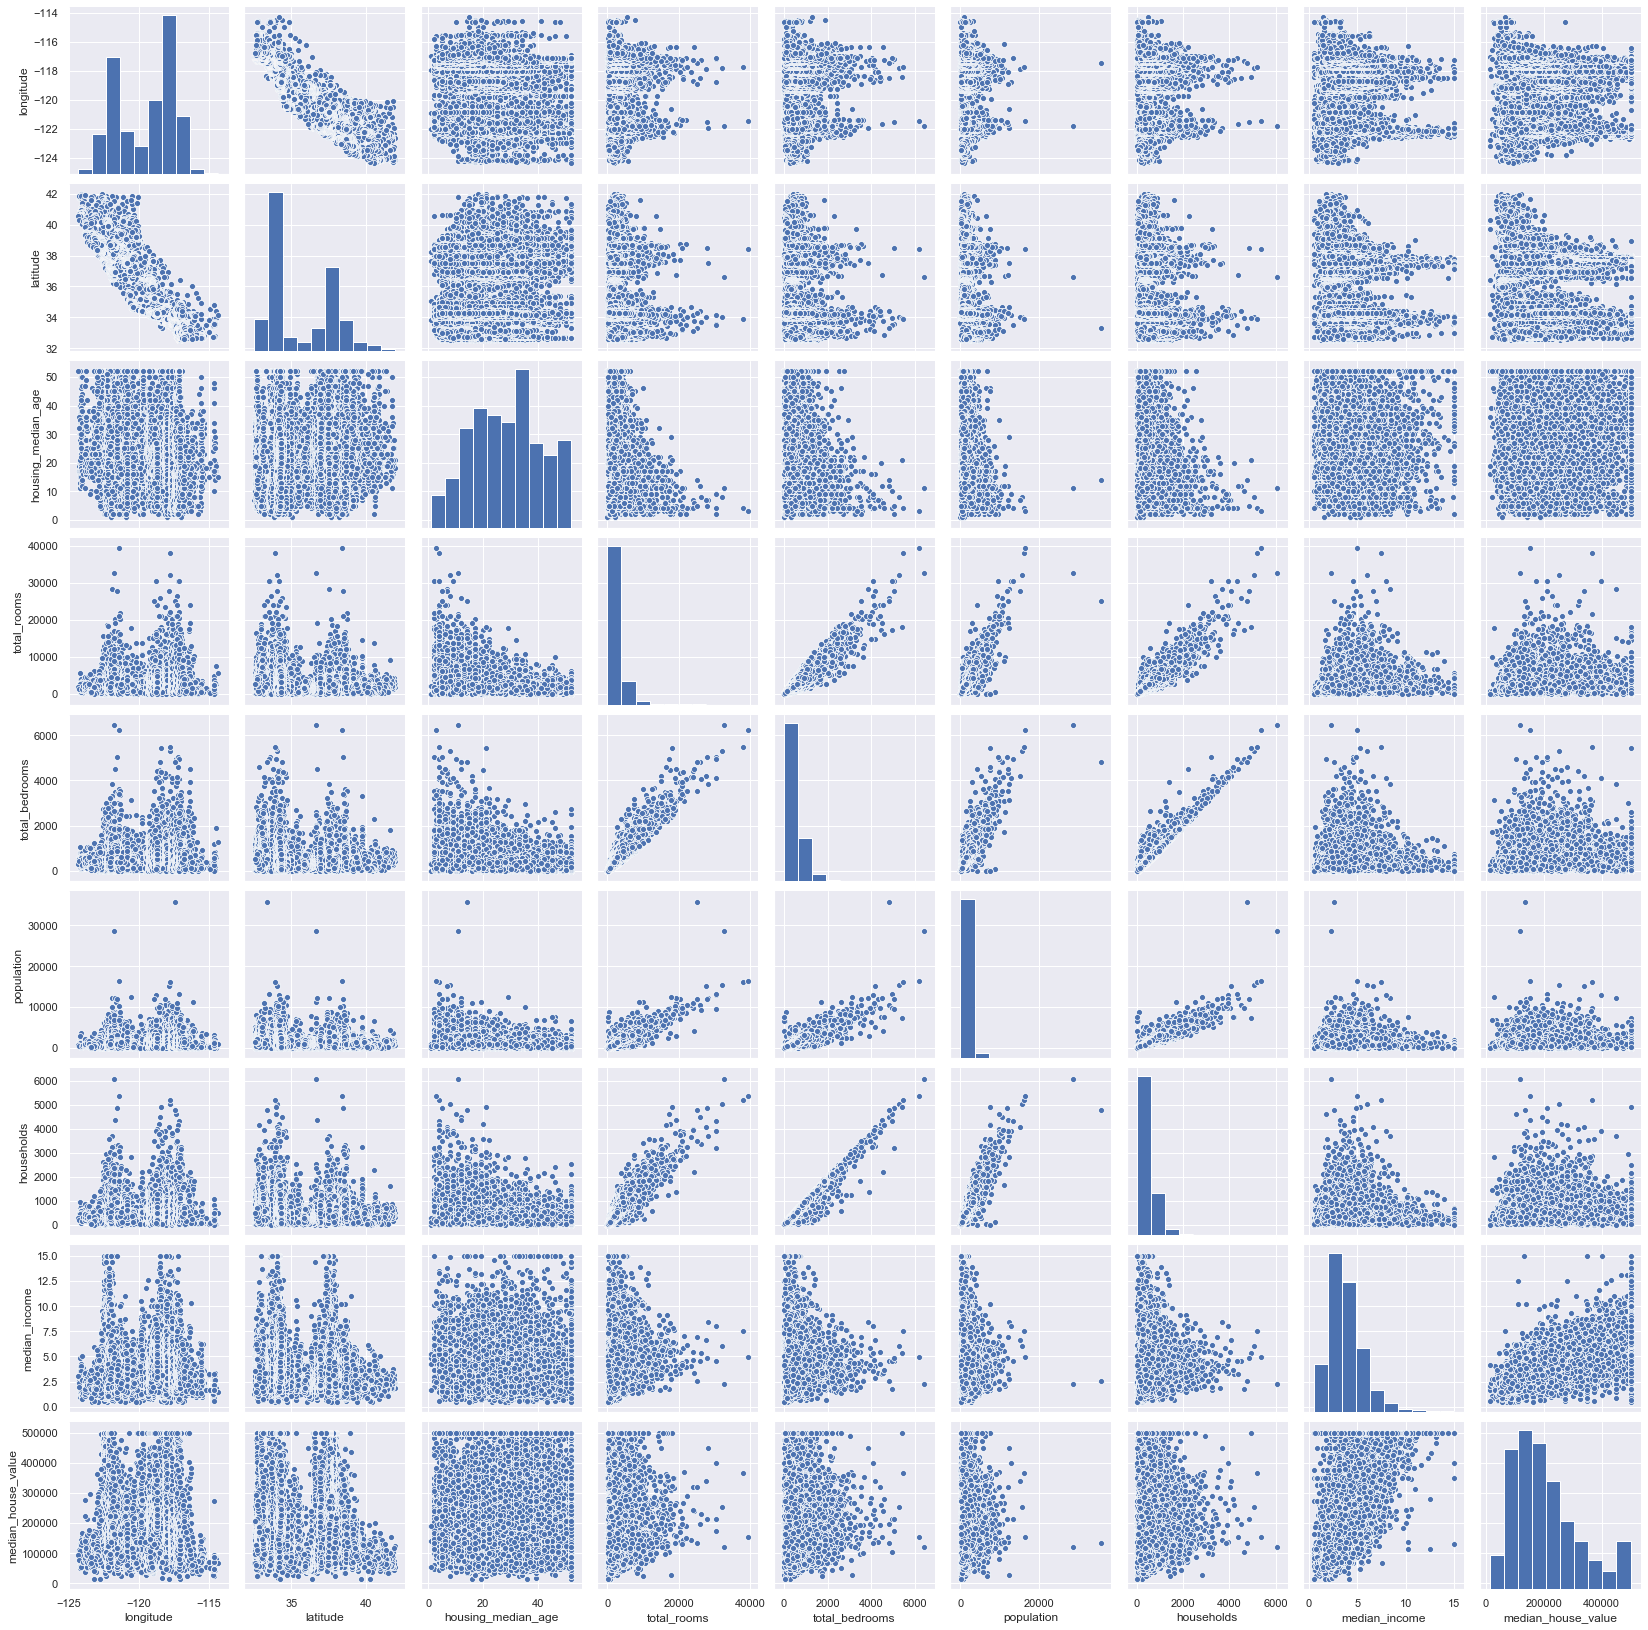

In [200]:
import seaborn as sns
sns.set()
sns.pairplot(df)

In [128]:
X=df.drop(['median_house_value'],axis=1)

In [115]:
y=df['median_house_value']

In [129]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [130]:
X = X.fillna(value=df["total_bedrooms"].mean())

In [68]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [131]:
X['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [132]:
X['ocean_proximity']=pd.Categorical(X['ocean_proximity'])

In [133]:
X['ocean_proximity'] = X['ocean_proximity'].cat.codes

In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  int8   
dtypes: float64(4), int64(4), int8(1)
memory usage: 1.3 MB


In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.25, random_state =21)

In [79]:
from sklearn.preprocessing import StandardScaler
sdt=StandardScaler()

In [80]:
X_train=sdt.fit_transform(X_train)
X_test=sdt.fit_transform(X_test)

In [81]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #instantiating the estimator object 
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
print(lin_reg.intercept_)

206380.58184754493


In [83]:
print(lin_reg.coef_)

[-85407.15973848 -90838.00145392  14196.52030491 -11765.98943956
  28165.41665322 -49944.73060374  38453.16929897  74734.66320139
   -128.63253185]


In [84]:
y_pred = lin_reg.predict(X_test)

In [85]:
import numpy as np
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("The root mean suqared error value of my model is :", RMSE)

The root mean suqared error value of my model is : 71510.93561991809


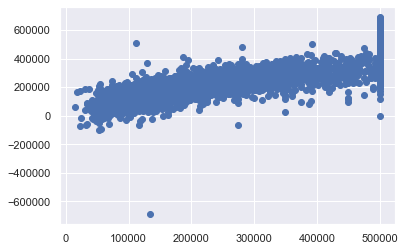

In [90]:
plt.scatter(y_test,y_pred) 

In [91]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE: {mean_absolute_error(y_pred,y_test)}\n\nMSE: {mean_squared_error(y_pred,y_test)}\n\nRMSE: {np.sqrt(mean_squared_error(y_pred,y_test))}')

MAE: 52023.731467916754

MSE: 5113813913.236071

RMSE: 71510.93561991809


In [92]:
print(f"MIN : {df['median_house_value'].min()}\n\nMAX: {df['median_house_value'].max()}")

MIN : 14999

MAX: 500001


# Decision Tree Reggressor

In [94]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [95]:
y_pred1 = lin_reg.predict(X_test)

In [96]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE: {mean_absolute_error(y_pred1,y_test)}\n\nMSE: {mean_squared_error(y_pred1,y_test)}\n\nRMSE: {np.sqrt(mean_squared_error(y_pred1,y_test))}')

MAE: 52023.731467916754

MSE: 5113813913.236071

RMSE: 71510.93561991809


# Random Forest Regressor

In [175]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [176]:
y_pred2 = regr.predict(X_test)

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE: {mean_absolute_error(y_pred2,y_test)}\n\nMSE: {mean_squared_error(y_pred2,y_test)}\n\nRMSE: {np.sqrt(mean_squared_error(y_pred2,y_test))}')

MAE: 52023.731467916754

MSE: 5113813913.236071

RMSE: 71510.93561991809


  # Linear Regresion withe on variable

In [168]:
X_train=X_train[['median_income']].values

In [169]:
X_train = X_train.reshape(-1,1)

In [170]:
X_train.shape

(15480, 1)

In [171]:
X_test=X_test[['median_income']].values
X_test = X_test.reshape(-1,1)

In [172]:
lin_reg1 = LinearRegression() #instantiating the estimator object 

In [173]:
lin_reg.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
y_pred3=lin_reg.predict(X_test)

In [180]:
print(f'MAE: {mean_absolute_error(y_pred3,y_test)}\n\nMSE: {mean_squared_error(y_pred3,y_test)}\n\nRMSE: {np.sqrt(mean_squared_error(y_pred3,y_test))}')

MAE: 63747.365245467125

MSE: 7184550626.157208

RMSE: 84761.7285463033


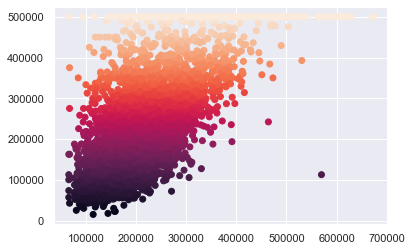

In [193]:
t=y_test
plt.scatter(y_pred3, y_test, c=t)


In [190]:
import pandas as pd
data = {'Predicted': y_pred3,'Actual': y_test}
df = pd.DataFrame(data)
df.head()

,Predicted,Actual
18726,112075.751235,98800
1046,150666.089562,157200
15508,222290.795838,160900
828,281086.946551,206500
19007,146814.173400,101700


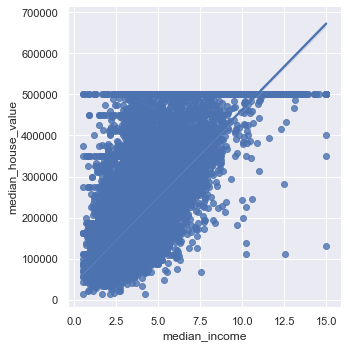

In [196]:
sns.lmplot(x='median_income',y='median_house_value',data=df)